<a href="https://colab.research.google.com/github/oussamaJMAA/DataPreparation/blob/main/AmericanAgency2014_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas_profiling import ProfileReport
from scipy.stats import boxcox
from sklearn.model_selection import KFold, cross_val_score
%matplotlib inline
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [ ]:
#Importing the Dataset
dataset = pd.read_excel("AgencyDataset.xlsx")
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Exploratory Data Analysis


In [ ]:
#Get column types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [ ]:
#Statistical summary
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
#Check for null values
dataset.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
numerical_features = dataset.select_dtypes(include=['float64','int64'])
discrete_features = dataset[['view','condition','waterfront']]
categorical_features = dataset.select_dtypes(include=['object'])

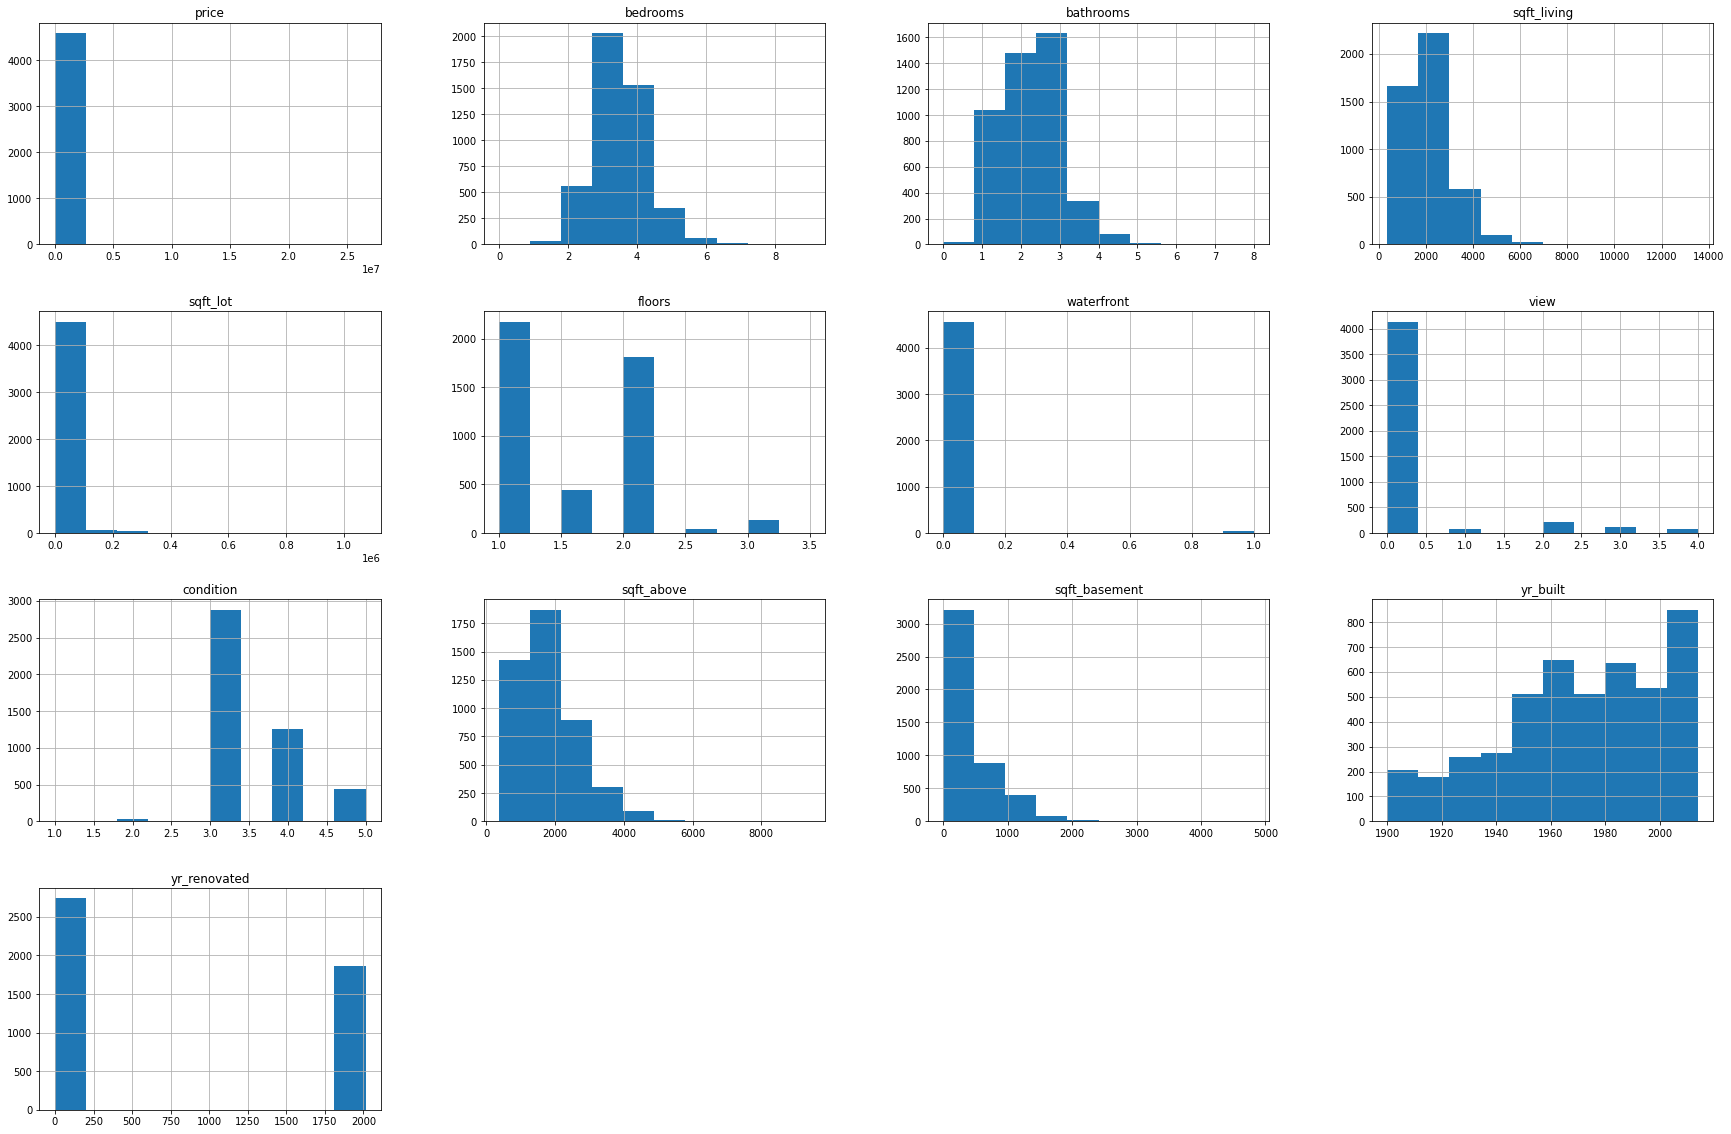

In [ ]:
#plot the frequency  and the distribution of the numerical features
numerical_features.hist(figsize=(30,20))
plt.show()

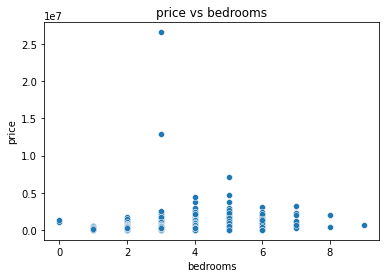

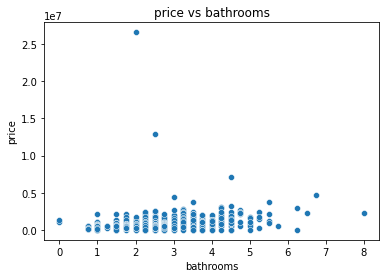

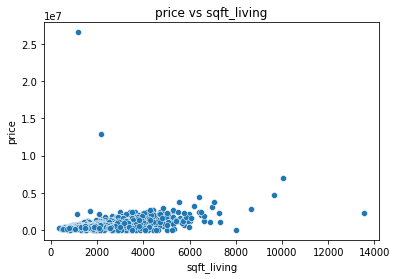

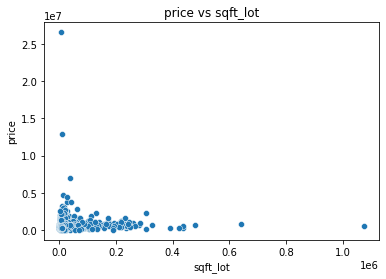

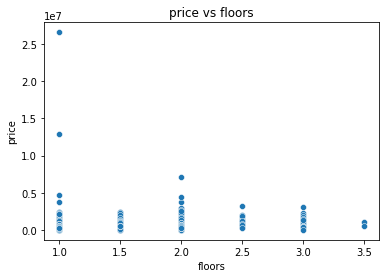

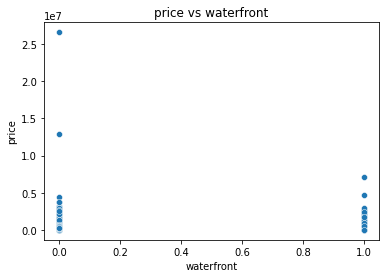

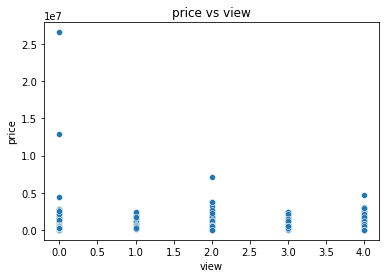

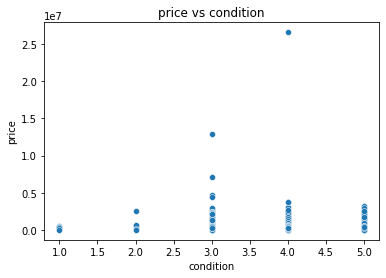

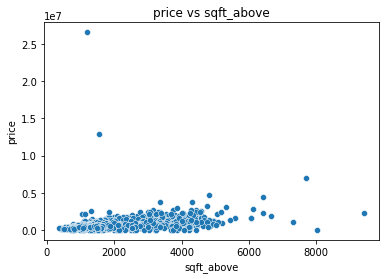

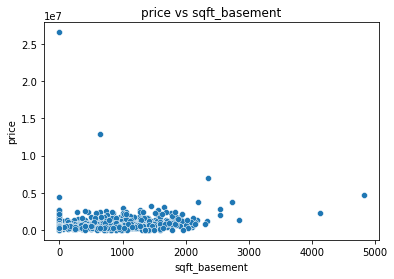

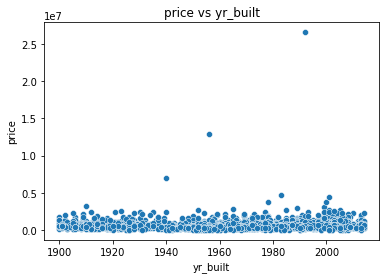

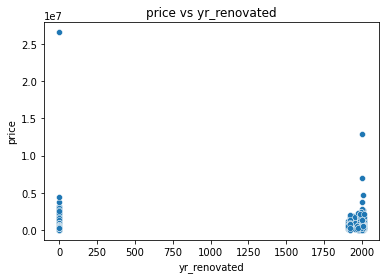

In [ ]:
#Relationship between the independant features and the price
for feature in numerical_features[numerical_features.columns.drop('price')]:
    sns.scatterplot(y='price',x=feature,data=dataset)
    plt.title(f"price vs {feature}")
    print('\n')
    plt.show()


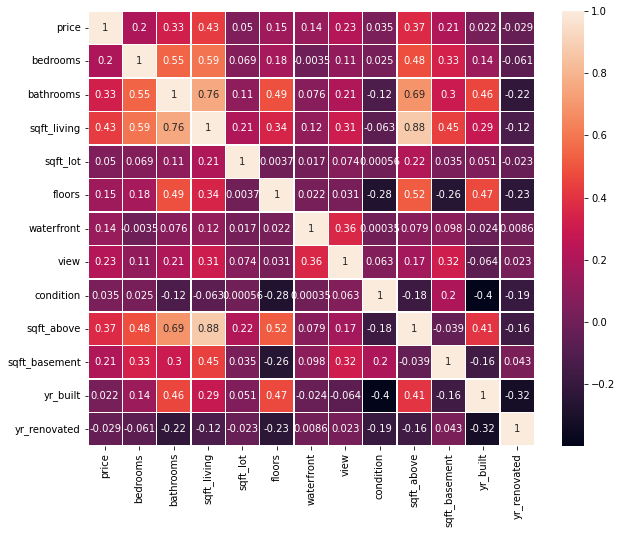

In [ ]:
#Detecting correlations 
fig, ax = plt.subplots(figsize=(10,8))        
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, ax=ax)

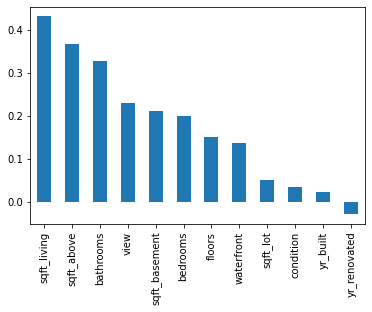

In [ ]:
#Detecting the most correlated variables with the price
dataset.corr()['price'].sort_values(ascending=False).drop('price').plot(kind='bar')

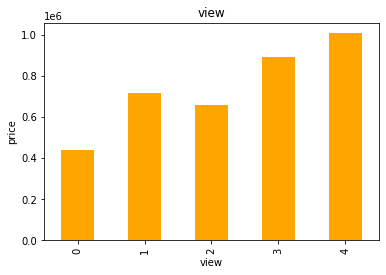

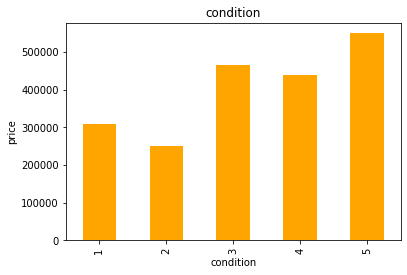

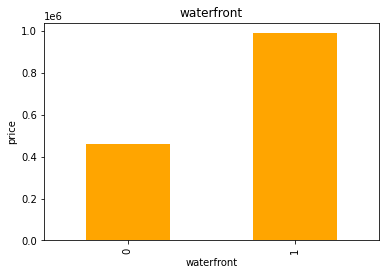

In [ ]:
#Relationship between the price and the discrete features
for feature in discrete_features:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar(color="orange")
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    print('\n')
    plt.show()

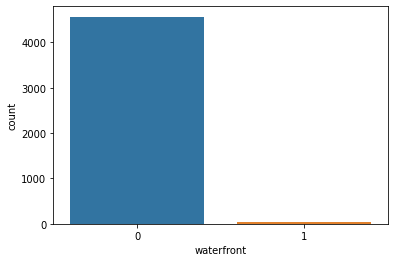

In [ ]:
sns.countplot(dataset['waterfront'])

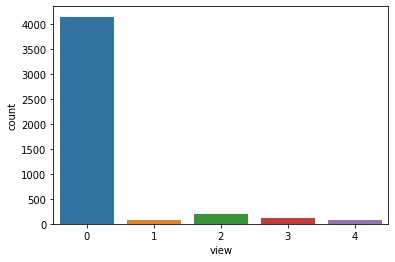

In [ ]:
sns.countplot(dataset['view'])

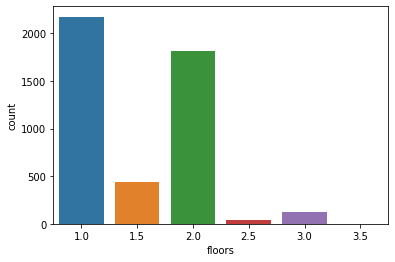

In [ ]:
sns.countplot(x='floors',data=dataset)

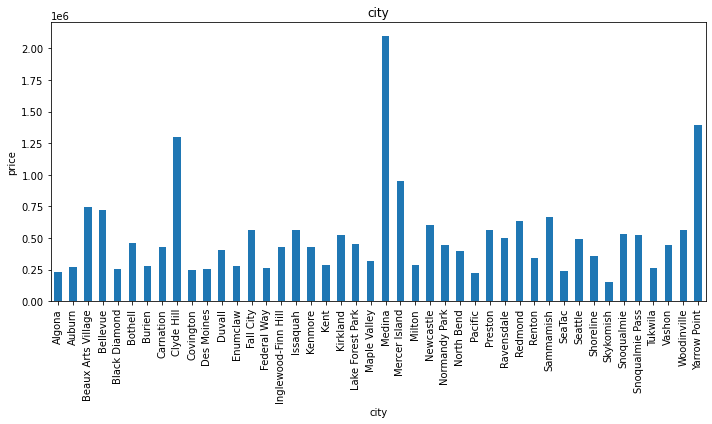

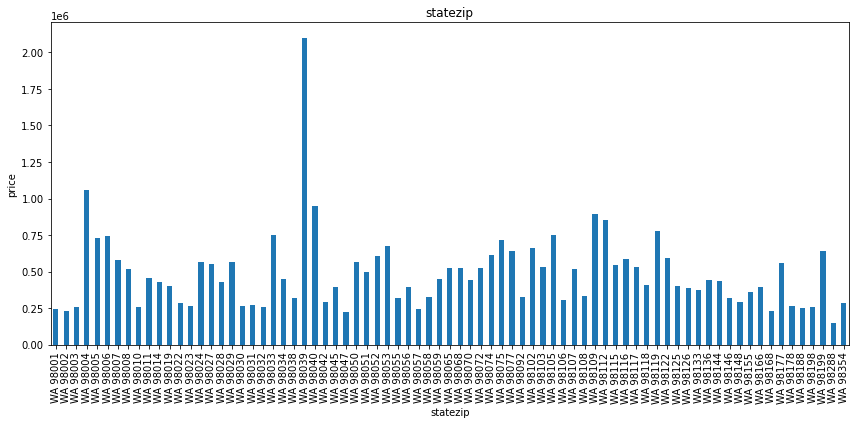

In [ ]:
#Relationship between categorical variables and the house price
# city vs price
data=dataset.copy()
plt.figure(figsize=(10,6))
data.groupby('city')['price'].median().plot.bar()
plt.xlabel('city')
plt.ylabel('price')
plt.title('city')
plt.tight_layout()
plt.show()
# statezip vs price
plt.figure(figsize=(12,6))
data.groupby('statezip')['price'].median().plot.bar()
plt.xlabel('statezip')
plt.ylabel('price')
plt.title('statezip')
plt.tight_layout()
print('\n')
plt.show()


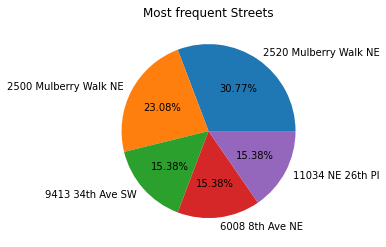

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

In [ ]:
#pie charts
street_names = dataset['street'].value_counts().index
street_values = dataset['street'].value_counts().values
plt.pie(street_values[:5],labels=street_names[:5],autopct='%1.2f%%')
plt.title("Most frequent Streets")
plt.show()
#plt.pie(street_values[:6],labels=street_names[:6],autopct='%1.2f%%')
dataset['street'].value_counts()

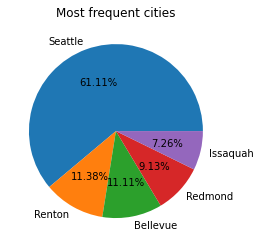

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [ ]:
#pie charts
city_names = dataset['city'].value_counts().index
city_values = dataset['city'].value_counts().values
plt.pie(city_values[:5],labels=city_names[:5],autopct='%1.2f%%')
plt.title("Most frequent cities")
plt.show()
#plt.pie(street_values[:6],labels=street_names[:6],autopct='%1.2f%%')
dataset['city'].value_counts()

In [126]:
#Importing the Dataset
dataset = pd.read_excel("AgencyDataset.xlsx")
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [127]:
#Dropping the country column because it has one dominant category 
dataset.drop(['country'],axis=1,inplace=True)

In [128]:
#Dropoing rows that has 0 in price , bedrooms and bathrooms  
dataset.drop(dataset[dataset['price']==0].index,inplace=True)
dataset.drop(dataset[dataset['bedrooms']==0].index,inplace=True)
dataset.drop(dataset[dataset['bathrooms']==0].index,inplace=True)


In [ ]:
#Number of zeroes in each column
for column_name in dataset:
    column = dataset[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  date  is :  0
Count of zeros in column  price  is :  0
Count of zeros in column  bedrooms  is :  0
Count of zeros in column  bathrooms  is :  0
Count of zeros in column  sqft_living  is :  0
Count of zeros in column  sqft_lot  is :  0
Count of zeros in column  floors  is :  0
Count of zeros in column  waterfront  is :  4519
Count of zeros in column  view  is :  4102
Count of zeros in column  condition  is :  0
Count of zeros in column  sqft_above  is :  0
Count of zeros in column  sqft_basement  is :  2716
Count of zeros in column  yr_built  is :  0
Count of zeros in column  yr_renovated  is :  2706
Count of zeros in column  street  is :  0
Count of zeros in column  city  is :  0
Count of zeros in column  statezip  is :  0


In [ ]:
#print highly correlated variables
corr_features =[]

for i , r in dataset.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features

[['bedrooms', 'bathrooms', 0.545645206840986],
 ['bedrooms', 'sqft_living', 0.6016144987588385],
 ['bathrooms', 'bedrooms', 0.545645206840986],
 ['bathrooms', 'sqft_living', 0.7615444394303039],
 ['bathrooms', 'sqft_above', 0.6924940694812943],
 ['sqft_living', 'bedrooms', 0.6016144987588385],
 ['sqft_living', 'bathrooms', 0.7615444394303039],
 ['sqft_living', 'sqft_above', 0.875418268332467],
 ['floors', 'sqft_above', 0.521989982664378],
 ['sqft_above', 'bathrooms', 0.6924940694812943],
 ['sqft_above', 'sqft_living', 0.875418268332467],
 ['sqft_above', 'floors', 0.521989982664378]]

In [ ]:
#highly correlated features that is above 0.8
feat =[]
for i in corr_features:
    if i[2] >= 0.8:
        feat.append(i[0])
        feat.append(i[1])
        
print(list(set(feat)))       

['sqft_above', 'sqft_living']


In [ ]:
#Removing sqft_above because it's highly correlated with the sqft_living 
dataset.drop(['sqft_above'], axis=1, inplace=True)

In [ ]:
# #one hot encoding on the city value 
# def one_hot_top_x(dataframe,feature,top_x_labels):
#   for label in top_x_labels:
#     dataframe[feature +'_'+label] = np.where(dataframe[feature]==label,1,0)
# top_10_cities = [city for city in dataset.city.value_counts().sort_values(ascending=False).head(10).index]
# top_10_cities 

In [129]:
#Target encoding on the city feature ( replacing each city by its average price)
city_mean_prices = dataset.groupby('city')['price'].mean()
dataset['city_encoded'] = dataset['city'].map(city_mean_prices)

In [132]:
dataset['yr_renovated']= np.where(dataset['yr_renovated']==0,dataset['yr_built'],dataset['yr_renovated'])

In [134]:
#Transform the yr_renovated  to a new column (renovation_age)
dataset['renovation_age'] = 2014 - dataset['yr_renovated']

In [ ]:
# dataset['renov_age'] = np.abs(dataset['yr_renovated'] - dataset['yr_built'])
# dataset['renov_age'] = dataset.renov_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

In [136]:
year = pd.DatetimeIndex(dataset['date']).year
dataset['house_age'] = year - dataset['yr_built']

In [137]:
#Transforming statezip to numerical type
dataset['statezip'] = dataset['statezip'].str.strip('WA').astype('float')
dataset['statezip'].dtype

dtype('float64')

In [138]:
#Dropping rows that have living & basement & above surfaces greater than the house surface 
dataset.drop(dataset.index[(dataset['sqft_living']>dataset['sqft_lot'])|(dataset['sqft_basement']>dataset['sqft_lot'])], inplace = True)

In [139]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,city_encoded,renovation_age,house_age
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133.0,420392.364047,9,59
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921,709 W Blaine St,Seattle,98119.0,583967.523099,93,93
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966,26206-26214 143rd Ave SE,Kent,98042.0,441880.990543,48,48
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963,857 170th Pl NE,Bellevue,98008.0,862255.052017,51,51
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,98052.0,664965.780656,22,38


In [140]:
#remove unwanted columns like yr_built, date ,yr_renovated
dataset.drop(['date', 'yr_built', 'yr_renovated','street','city'], axis=1, inplace=True)
dataset.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,statezip,city_encoded,renovation_age,house_age
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,98133.0,420392.364047,9,59
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,98119.0,583967.523099,93,93
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,98042.0,441880.990543,48,48
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,98008.0,862255.052017,51,51
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,98052.0,664965.780656,22,38


In [ ]:
df = dataset.copy()

In [ ]:
# Z_score
highest_allowed = dataset['price'].mean() + 3*dataset['price'].std()
lowest_allowed = dataset['price'].mean() - 3*dataset['price'].std()
df2= df[~(df['price'] > highest_allowed) | (df['price'] < lowest_allowed)]

In [ ]:
df2.price.skew()

1.8576572184373823

In [ ]:
new_df = df[(df['price'] < highest_allowed) & (df['price'] >lowest_allowed )]
new_df.shape

(4347, 23)

In [ ]:
# df['price'] = np.where(df['price']>highest_allowed,highest_allowed,df['price'])
# df['price'] = np.where(df['price']<lowest_allowed,lowest_allowed,df['price'])


(4378,)

skewness of price is 24.88244835637927


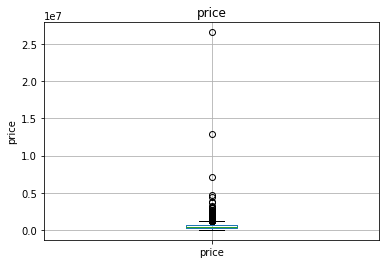

skewness of sqft_living is 1.6974967168113668


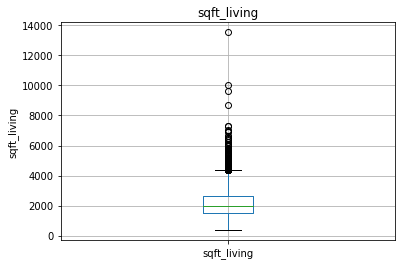

skewness of sqft_lot is 11.163640328436136


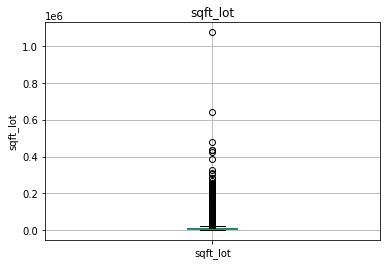

skewness of sqft_basement is 1.6287316621138856


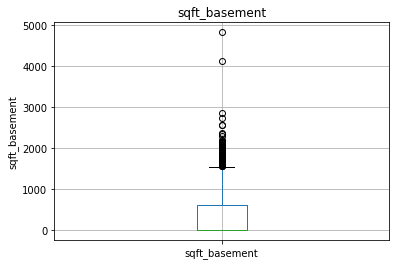

skewness of city_encoded is 1.992627775052593


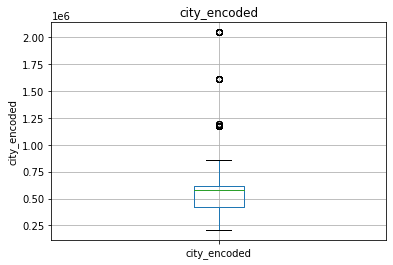

In [ ]:
#Visualizing the outliers
for feature in dataset[['price', 'sqft_living', 'sqft_lot','sqft_basement','city_encoded']]:
    dataset.boxplot(column=feature)
    print(f"skewness of {feature} is {dataset[feature].skew()}")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [264]:
df3 = dataset.copy()

In [265]:
for col in['price','sqft_living', 'sqft_lot','sqft_basement']:
  low, high = df3[col].quantile([0.05, 0.95])
  for i in df3[col].index:
    if (df3[col][i]<low):
        df3.loc[i, col] = low
    elif df3[col][i]>high:
      df3.loc[i, col] = high  



 price skewness is 0.14357422824621677


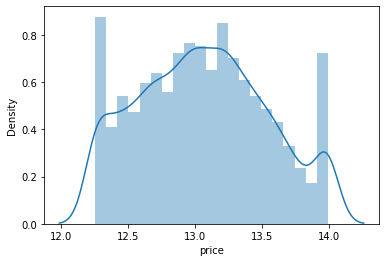

 sqft_lot skewness is 0.806586386218129


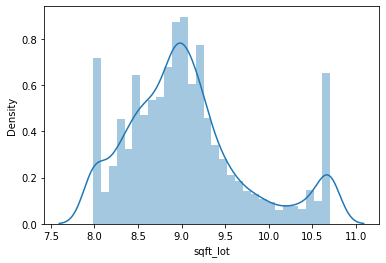

 sqft_living skewness is -0.13940259067202954


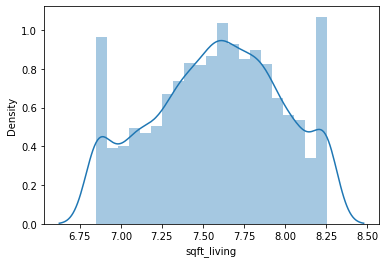

In [266]:
for feature in ['price','sqft_lot','sqft_living']:
  for i in df3[feature].index:
    df3.loc[i, feature] = np.log(df3[feature][i])
  print(f" {feature} skewness is {df3[feature].skew()}")
  sns.distplot(df3[feature])
  plt.show()

In [286]:
df3.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'statezip', 'city_encoded', 'renovation_age',
       'house_age'], dtype=object)

In [267]:
X = df3.drop(['price'],axis=1)
y= df3['price']
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,statezip,city_encoded,renovation_age,house_age
count,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4.378000e+03,4378.000000,4378.000000
mean,3.418456,2.143330,7.581549,9.052786,1.474874,0.006624,0.236409,3.465281,1837.695751,297.173367,98078.292599,5.565037e+05,29.536775,44.457058
std,0.902790,0.779794,0.393297,0.688643,0.504206,0.081127,0.766311,0.681225,861.003894,416.696795,53.302033,1.939059e+05,26.827913,29.385740
min,1.000000,0.750000,6.845880,7.984786,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,98001.000000,2.072880e+05,0.000000,0.000000
25%,3.000000,1.750000,7.299797,8.575933,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,98033.000000,4.203924e+05,10.000000,20.000000
50%,3.000000,2.250000,7.600902,8.965845,1.500000,0.000000,0.000000,3.000000,1610.000000,0.000000,98065.000000,5.839675e+05,20.000000,41.000000
75%,4.000000,2.500000,7.874739,9.327101,2.000000,0.000000,0.000000,4.000000,2320.000000,620.000000,98117.000000,6.149121e+05,42.000000,64.000000
max,9.000000,8.000000,8.258422,10.701693,3.000000,1.000000,4.000000,5.000000,9410.000000,1210.000000,98354.000000,2.046559e+06,114.000000,114.000000


In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,statezip,city_encoded,renov_age,house_age
0,3,1.50,7.200425,8.976136,1.5,0,0,3,0,98133.0,12.948944,50.0,59
1,5,2.50,8.202482,9.110520,2.0,0,4,5,280,98119.0,13.277601,0.0,93
2,3,2.00,7.565275,9.388235,1.0,0,0,4,0,98042.0,12.998796,0.0,48
3,3,2.25,7.600902,8.990940,1.0,0,0,4,1000,98008.0,13.667306,0.0,51
4,4,2.50,7.570443,9.259131,1.0,0,0,4,800,98052.0,13.407491,16.0,38


In [336]:
#Testing with linear regression
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.29, random_state=42)
lr= LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(r2_score(y_test, pred))
print(mean_squared_error(y_test,pred))


0.7057611128176957
0.06704896843689384


In [269]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.36, random_state=42)
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.01,.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 7,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 7 folds for each of 12 candidates, totalling 84 fits
0.8305528087583607
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [277]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.29, random_state=42)
xgb2 = XGBRegressor(colsample_bytree= 0.7, learning_rate =0.05, max_depth =7, min_child_weight =4, n_estimators= 200, nthread= 4,silent=1,subsample=0.7,objective='reg:linear')
xgb2.fit(x_train, y_train)
pred = xgb2.predict(x_test)
print(r2_score(y_test, pred))
print(mean_squared_error(y_test,pred))

0.8327120279807405
0.03812033842026398


In [332]:
for var, imp in zip(X.columns, xgb2.feature_importances_):
    if imp != 0:
        print(f'{var}: {(imp*100)}%')

bedrooms: 1.9280379638075829%
bathrooms: 2.930922992527485%
sqft_living: 20.132562518119812%
sqft_lot: 2.2267770022153854%
floors: 1.6509052366018295%
waterfront: 6.368986517190933%
view: 13.627295196056366%
condition: 2.8973866254091263%
sqft_above: 5.178430303931236%
sqft_basement: 2.077024430036545%
statezip: 5.733909457921982%
city_encoded: 30.958491563796997%
renovation_age: 1.7649587243795395%
house_age: 2.524299919605255%


In [317]:
xgb2.feature_importances_

array([0.01928038, 0.02930923, 0.20132563, 0.02226777, 0.01650905,
       0.06368987, 0.13627295, 0.02897387, 0.0517843 , 0.02077024,
       0.05733909, 0.30958492, 0.01764959, 0.025243  ], dtype=float32)

In [302]:
names=df3.drop(['price'],axis=1).columns.values.reshape(-1,1)
names.shape

(14, 1)

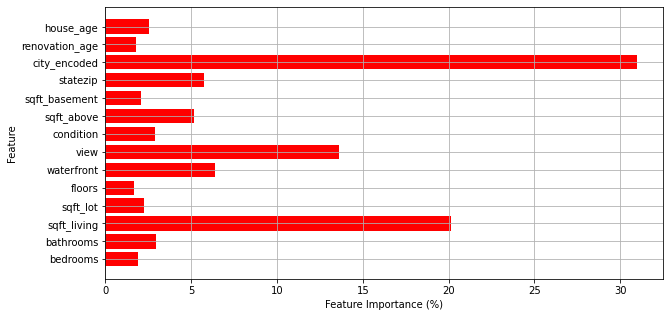

In [335]:
plt.figure(figsize=(10,5))
plt.barh(df3.drop(['price'],axis=1).columns.values,xgb2.feature_importances_*100,align='center', color='red')
plt.xlabel("Feature Importance (%)")
plt.ylabel("Feature")
plt.grid(True)
plt.show()